# 1. 단변량 데이터 탐색

먼저 한변수 씩 데이터를 탐색해 보겠습니다. 각 컬럼(변수)의 개수와 자료형태를 확인합니다.


In [3]:
# CEO Salary 데이터 탐색
import pandas as pd
data = pd.read_csv('./extrafiles/Ex_CEOSalary.csv', encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [3]:
# 자료의 특성 과 구조를 파악
data.head()

,salary,sales,roe,industry
0,1095,27595.000000,14.1,1
1,1001,9958.000000,10.9,1
2,1122,6125.899902,23.5,1
3,578,16246.000000,5.9,1
4,1368,21783.199219,13.8,1


이 자료는 기업의 매출과 수익이 CEO 의 연봉에 미치는 영향관계를 분석하기 위한 데이터 입니다. 따라서 **독립변수(특성치)는 sales 과 roe** 가 되고 **종속 변수는 salary** 가 되겠습니다.

## 1.1 범주형 자료의 탐색

변수중 'industry'는 범주형 변수 (categorical variable) 입니다. 각 숫자는 산업유형을 의미하며, 각 범주별 빈도를 파악 하기 위해서 value_count() 명령을 수행 하여 봅니다.


In [5]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [7]:
# 각 데이터에 라벨을 부여 해 식별성을 높여 본다.
data['industry'] = data['industry'].replace([1, 2, 3, 4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

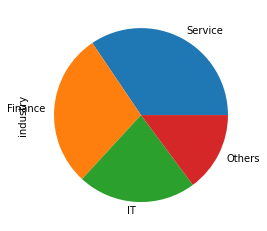

In [8]:
# matplotlib inline

%matplotlib inline
data['industry'].value_counts().plot(kind="pie") # pandas 에서 matplotlib 을 바로 호출 할 수 있네.

<AxesSubplot:>

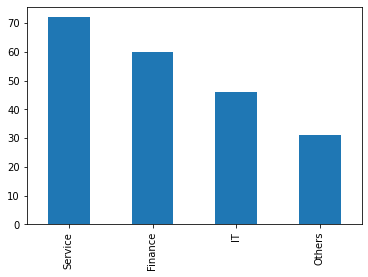

In [9]:
data['industry'].value_counts().plot(kind="bar")

## 1.2 연속형 자료의 탐색

범주형이 아닌 **연속형(숫자형) 자료는 describe() 함수를 이용하여 기술통계량(descriptive statistics) 을 확인** 할 수 있다.

In [10]:
# 기술통계량 조회
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


`여기서 주목 해야 할 숫자는 평균(mean)과 중위수(50%)의 차이가 크지 않은지 이다.` **평균과 중위수의 차이가 적을 수록 이상치가 적은 데이터**를 의미한다. roe 의 평균과 중위수는 각각 17.2 15.5로 유사한 반면, salary(1281, 1039) 와 sales(6923, 3705) 는 평균과 중위수 차이가 크다. 때문에 두개의 변수에서는 이상치가 다수 존재할 것으로 예상 할 수 있다.

자료의 분포를 조금 더 구체적으로 확인 하기 위해 **왜도(skewness)와 첨도(kurtosis)를 살펴 정규분포를 따르는지 확인** 할 수 있다.

In [11]:
# 왜도
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

> **[해석]**
> 1. salary와 slaes 의 왜도가 모두 2보다 크며, 양의 값으로 우측 꼬리 분포 형태를 보일것으로 판단된다.
> 2. 왜도는 0일때 정규분포와 일치하는 대칭 형태가 된다.
> 3. 왜도가 2보다 클 경우 어느 한쪽으로 치우친 그래프가 된다.
> 4. 왜도가 음수(-)이면 오른쪽에 자료가 더 많고 이상치는 작은 값들이 있다는 의미이다.
> 5. 왜도가 양수(+)이면 왼쪽에 자료가 더 많고 이상치는 큰 값에 많이 있다는 의미이다.

In [12]:
# 첨도
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

> **[해석]**
> 1. 첨도는 salary 와 sales 에 각각 59, 33 으로 높다.
> 2. 첨도는 0에 가까울수록 정규분포를 따르게 된다.
> 3. 값이 큰 수록 중심에 자료가 집중 되어 있다는 의미이다.


**그외 기술 통계량 함수들**

|함수|설명|
|:--|:--|
|count|N/A 값을 제외한 값의 수를 반환|
|describe|시리즈 혹은 데이터 프레임의 각 열에 대한 기술 통계값 리턴|
|min, max|최소, 최대값|
|argmin, argmax|최소, 최대값을 가지고 있는 색인의 위치|
|idxmin, idxmax|최소 최대값을 가지고 있는 색인의 값|
|quantile|0부터 1까지의 분위수 계산|
|sum|합|
|mean|평균|
|median|중위값|
|mad|평균값에서 절대 평균편차|
|var|표본분산|
|std|표본 정규분산|
|skew|표본 비대칭도|
|kurt|표본 첨도|
|cumsum|누적 합|
|cummin, cummax|누적 최소값, 누적최대값|
|cumprod|누적 곱|
|diff|1차 산술자(시계열 데이터 사용시 유용)|
|pct_change|퍼센트 변화율 계산|
|corr|데이터 프레임내 모든 변수간 상관관계를 계산하여 리턴|
|cov|데이터 프레임내 모든 변수 간 공분산을 계산하여 리턴|


**연속형 자료의 형태를 확인하기 쉬운 방법은 각 변수의 분포를 히스토그램(histogram)으로 확인해 보는 것**이다. 이를 통해 정규성 여부, 이상치 존재여부등을 시각적으로 손쉽게 파악이 가능하다.


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

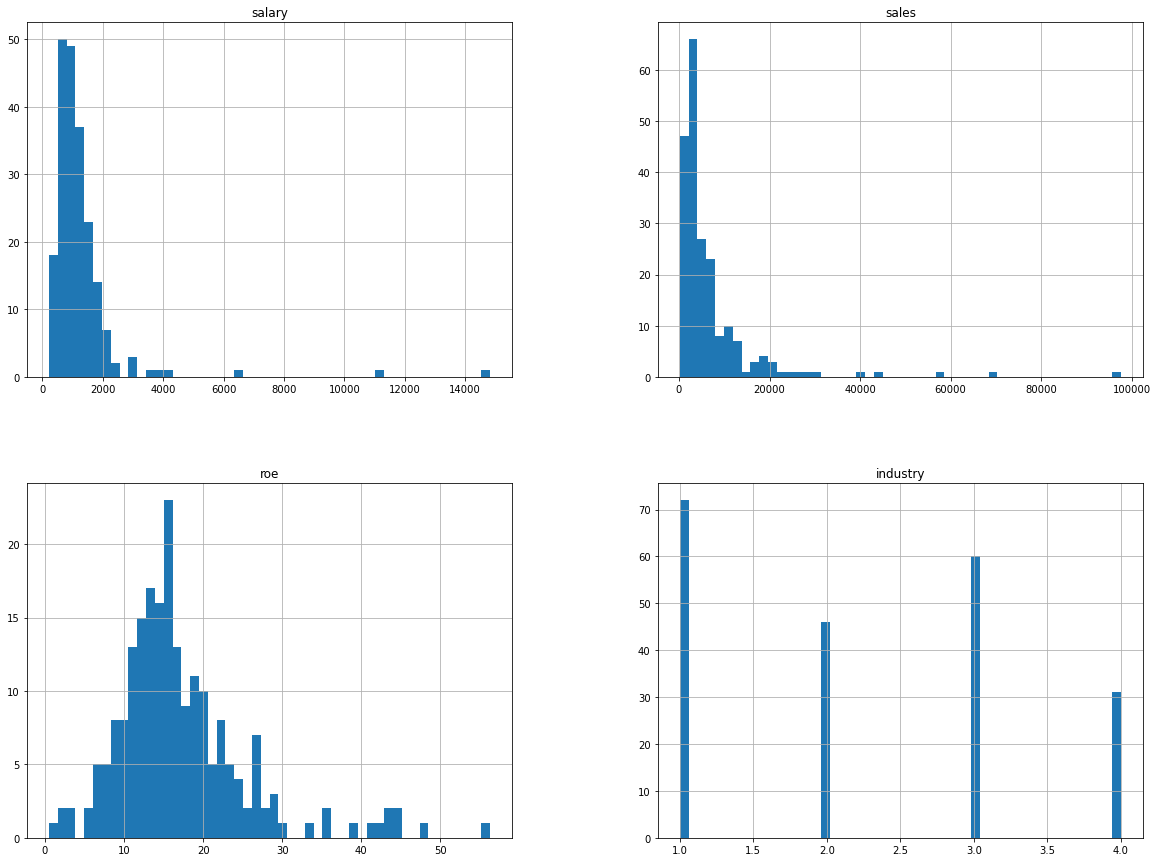

In [4]:
# 데이터 셋내 모든 변수의 히스토 그램 출력

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

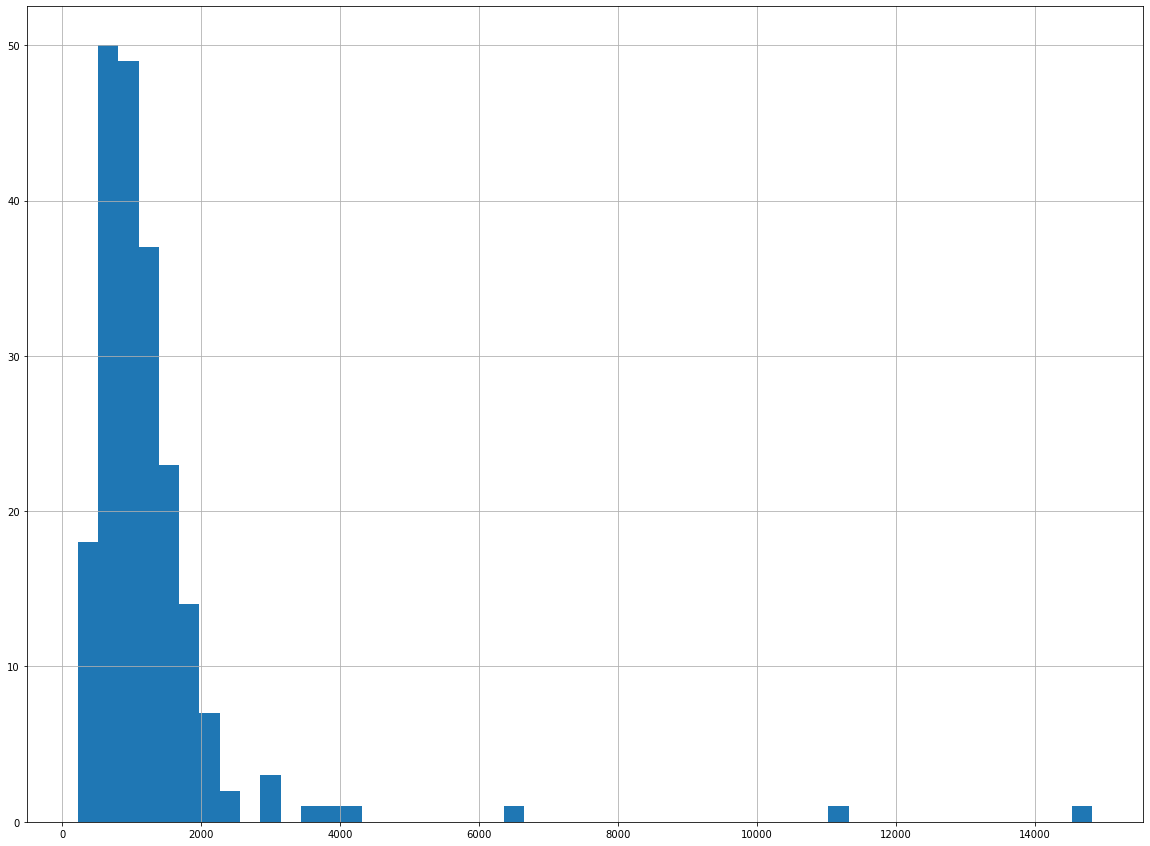

In [5]:
# 데이터 셋 내 특정 변수에 대한 히스토그램을 출력
data['salary'].hist(bins=50, figsize=(20, 15))

<AxesSubplot:>

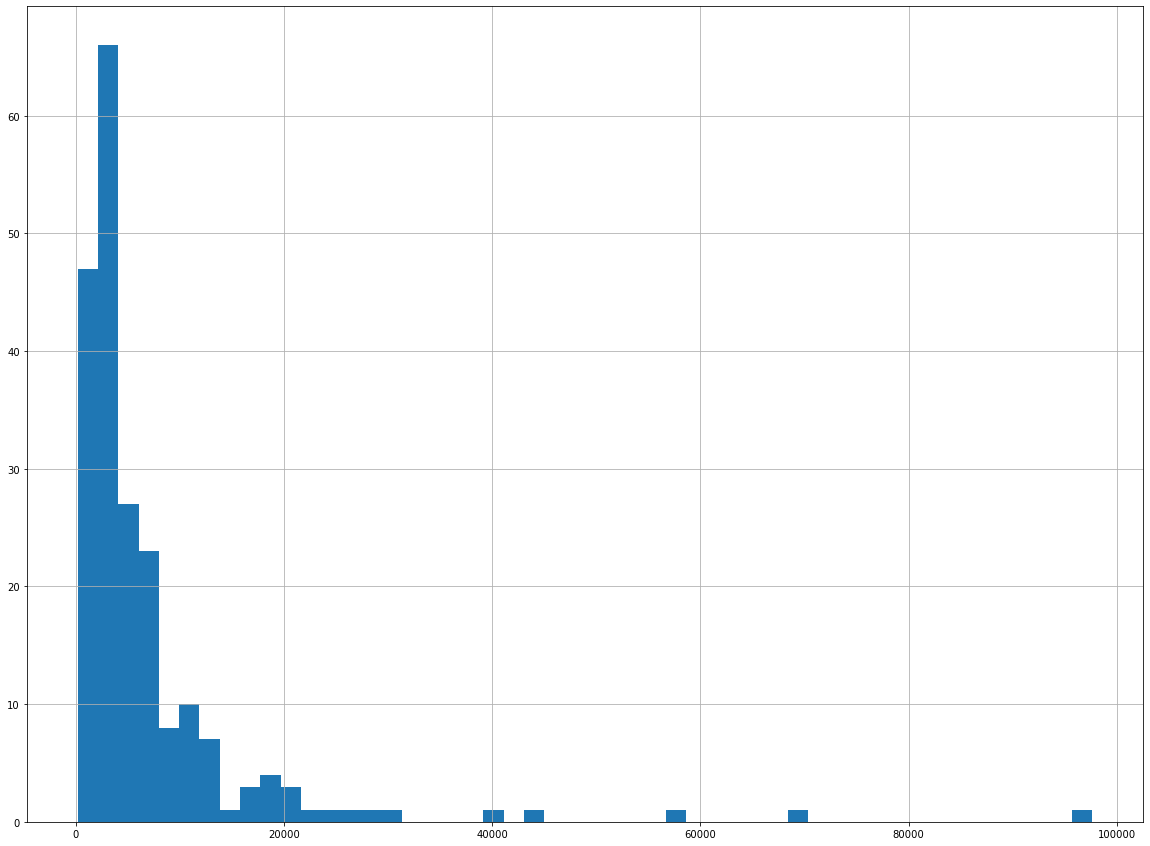

In [6]:
# 데이터 셋 내 특정 변수에 대한 히스토그램을 출력
data['sales'].hist(bins=50, figsize=(20, 15))

기술 통계(hist) 와 왜도(skewness) 및 첨도(kurtosis) 를 확인 해본 결과, salary와 sales 모두 몇몇 큰 이상치(outlier)로 인해 문제가 발생하고 있다는 것을 확인 할 수 있다.  

exp) **왜도와 첨도가 양수인 점을 들어 자료의 분포가 양의 부호로 편중 된 것을 확인 할 수 있었고, 히스토그램 시각화를 통해 실제 데이터가 정규 분포 형태가 아닌 왼쪽으로 집중된 데이터 임을 확인 할 수 있었다.**

해당 데이터 편중 문제를 해결 하기 위해서는 2가지 방법을 선택 적용 해야 한다.

1. **제거(delete)** : 일부 큰 값 또는 작은 값을 제거하여 정규성에 근사하게 만든다.
2. **변환(transform)** : 이상치가 차지하는 비중을 줄이기 위해 log변환 또는 제곱근 변환을 통하여 데이터 왜곡의 정도를 줄인다.